In [115]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [116]:
df = pd.read_csv(r'D:\nam_3\data_mining\BTL\car_sales_data.csv')
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [117]:
df.shape

(2500000, 9)

In [118]:
#=====================preprocessing data
df.isnull().sum()
# ==>   none rows contain null value

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Salesperson        object 
 2   Customer Name      object 
 3   Car Make           object 
 4   Car Model          object 
 5   Car Year           int64  
 6   Sale Price         int64  
 7   Commission Rate    float64
 8   Commission Earned  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 171.7+ MB


In [120]:
df.describe()

,Car Year,Sale Price,Commission Rate,Commission Earned
count,2.500000e+06,2.500000e+06,2.500000e+06,2.500000e+06
mean,2.015996e+03,3.001218e+04,9.998766e-02,3.001005e+03
std,3.739132e+00,1.154514e+04,2.887202e-02,1.481467e+03
min,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02
25%,2.013000e+03,2.001900e+04,7.496450e-02,1.821710e+03
50%,2.016000e+03,3.000600e+04,1.000058e-01,2.741910e+03
75%,2.019000e+03,4.002200e+04,1.250065e-01,3.978142e+03
max,2.022000e+03,5.000000e+04,1.500000e-01,7.494530e+03


-  The car sales data ranges from the year 2010 to 2022, with the mean car year being 2016.
-  The average sale price for a car is around $30,012, with a standard deviation of \$11,545, indicating that there is a wide range of sale prices in the dataset.
-  The commission rate ranges from 0.05 to 0.15, with an average of 0.099, indicating that the dealership pays out an average commission of 9.9% to their salespeople.
-  The average commission earned by a salesperson on a car sale is around $3,001, with a standard deviation of $1,481.

In [121]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year.astype(str)
df['Month'] = df['Date'].dt.month.astype(str)
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Year,Month
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73,2022,8
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40,2023,3
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63,2023,4
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20,2022,9
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85,2022,6


In [122]:
df.columns

Index(['Date', 'Salesperson', 'Customer Name', 'Car Make', 'Car Model',
       'Car Year', 'Sale Price', 'Commission Rate', 'Commission Earned',
       'Year', 'Month'],
      dtype='object')

In [123]:
#   show all car makes and car models
unique_car_makes = df['Car Make'].unique()
unique_car_models = df['Car Model'].unique()
print(f'Unique Car Makes: \n', unique_car_makes)
print(f'Unique Car Models: \n', unique_car_models)


Unique Car Makes: 
 ['Nissan' 'Ford' 'Honda' 'Toyota' 'Chevrolet']
Unique Car Models: 
 ['Altima' 'F-150' 'Civic' 'Silverado' 'Corolla']


In [124]:
car_make_counts = df['Car Make'].value_counts()
print(car_make_counts)

Car Make
Honda        500687
Chevrolet    500455
Toyota       500147
Ford         499781
Nissan       498930
Name: count, dtype: int64


In [125]:
car_model_counts = df['Car Model'].value_counts()
print(car_model_counts)

Car Model
Silverado    500842
Civic        500498
Corolla      500162
F-150        499679
Altima       498819
Name: count, dtype: int64


In [126]:
#   tính phần trăm xuất hiện
car_model_perc = df['Car Model'].value_counts(normalize=True) * 100
print(car_model_perc)

car_make_perc = df['Car Make'].value_counts(normalize=True) * 100
print(car_make_perc)


Car Model
Silverado    20.03368
Civic        20.01992
Corolla      20.00648
F-150        19.98716
Altima       19.95276
Name: proportion, dtype: float64
Car Make
Honda        20.02748
Chevrolet    20.01820
Toyota       20.00588
Ford         19.99124
Nissan       19.95720
Name: proportion, dtype: float64


In [127]:
### code bên kaggle 3
test = df.groupby('Salesperson')['Commission Rate'].mean()
test

#bảng tổng hoa hồng của nhân viên

Salesperson
Aaron Abbott     0.083790
Aaron Acevedo    0.100582
Aaron Acosta     0.126875
Aaron Adams      0.102565
Aaron Adkins     0.114887
                   ...   
Zoe Wright       0.091161
Zoe Yates        0.105092
Zoe Young        0.118742
Zoe Young MD     0.056683
Zoe Zimmerman    0.121571
Name: Commission Rate, Length: 518657, dtype: float64

In [128]:
# thêm vào bước 
df['TotalTransactions'] = 1
df1 = pd.pivot_table(df, 
                     index = 'Salesperson', 
                     aggfunc = {'Sale Price': 'sum','Commission Earned': 'sum', 'Commission Rate': 'mean', 'TotalTransactions': 'sum'}      
                    ).reset_index()

print(df1)

#   commision rate thì tính mean: trung bình hóa hồng từ tất cả các đơn hàng
#   mean Commission Rate = Tổng hoa hồng / Tổng số giao dịch

          Salesperson  Commission Earned  Commission Rate  Sale Price  \
0        Aaron Abbott            3396.01         0.083790       40530   
1       Aaron Acevedo           18318.72         0.100582      182492   
2        Aaron Acosta           18407.84         0.126875      149042   
3         Aaron Adams          129968.86         0.102565     1231897   
4        Aaron Adkins           10139.06         0.114887       84794   
...               ...                ...              ...         ...   
518652     Zoe Wright            4251.42         0.091161       46488   
518653      Zoe Yates            1688.31         0.105092       16065   
518654      Zoe Young            9094.49         0.118742       79493   
518655   Zoe Young MD             940.94         0.056683       16600   
518656  Zoe Zimmerman            3398.03         0.121571       27951   

        TotalTransactions  
0                       1  
1                       6  
2                       4  
3          

We will be asking: Is commision rate correlated with the total sales? In another words, do overall high performers really get compensated better?

To do so, we are using pivot table to organize the data by the following:

-   Unique Salesperson Name (So, we are looking at each person)
-   Sum Sales Price by Salesperson Name (Look at their total sales)
-   Average Commission Rate by Sales Person Name (Look at their average commission rate)
-   Sum Commisioned Earned by Salesperson (Just in case the average rate is misleading, so we also take a look at the nominal values)

-   tức là doanh thu nhiều nhưng chưa chắc lương đã cao (vì có thể những dòng xe của họ bấn có tỉ lệ hoa hồng ít), còn những người tuy đem lại ít doanh thu nhưng bán những dòng xe có tỉ lệ hoa hồng cao nên lương của họ vẫn cao

In [129]:
df1.sort_values(by=['Commission Rate'], ascending=False).head()

,Salesperson,Commission Earned,Commission Rate,Sale Price,TotalTransactions
93995,Christine Hernandez DDS,6984.73,0.150000,46565,1
276288,Kelly Mcfarland,5486.53,0.149999,36577,1
240967,Jodi Collier,4845.73,0.149999,32305,1
331290,Mathew Wolf,6253.46,0.149999,41690,1
217433,Jared Estes,7003.88,0.149998,46693,1


In [130]:
df1.sort_values(by=['Commission Earned'], ascending=False).head()

,Salesperson,Commission Earned,Commission Rate,Sale Price,TotalTransactions
343406,Michael Smith,3658467.56,0.098713,36806401,1229
342657,Michael Johnson,2883629.29,0.099849,29012949,976
123811,David Smith,2456566.33,0.101294,24208781,821
213701,James Smith,2448405.59,0.102539,23905299,796
425509,Robert Smith,2275950.52,0.100994,22541917,743


In [131]:
df1.sort_values(by=['TotalTransactions'], ascending=False).head()

,Salesperson,Commission Earned,Commission Rate,Sale Price,TotalTransactions
343406,Michael Smith,3658467.56,0.098713,36806401,1229
342657,Michael Johnson,2883629.29,0.099849,29012949,976
123811,David Smith,2456566.33,0.101294,24208781,821
213701,James Smith,2448405.59,0.102539,23905299,796
228050,Jennifer Smith,2233631.21,0.100152,22384383,753


In [132]:
df1.sort_values(by=['Sale Price'], ascending=False).head()

,Salesperson,Commission Earned,Commission Rate,Sale Price,TotalTransactions
343406,Michael Smith,3658467.56,0.098713,36806401,1229
342657,Michael Johnson,2883629.29,0.099849,29012949,976
123811,David Smith,2456566.33,0.101294,24208781,821
213701,James Smith,2448405.59,0.102539,23905299,796
343648,Michael Williams,2263033.88,0.099675,22816628,752


In [133]:
#   test
test_show = df.groupby('Salesperson')['TotalTransactions'].count()
test_show

Salesperson
Aaron Abbott      1
Aaron Acevedo     6
Aaron Acosta      4
Aaron Adams      40
Aaron Adkins      3
                 ..
Zoe Wright        2
Zoe Yates         1
Zoe Young         2
Zoe Young MD      1
Zoe Zimmerman     1
Name: TotalTransactions, Length: 518657, dtype: int64

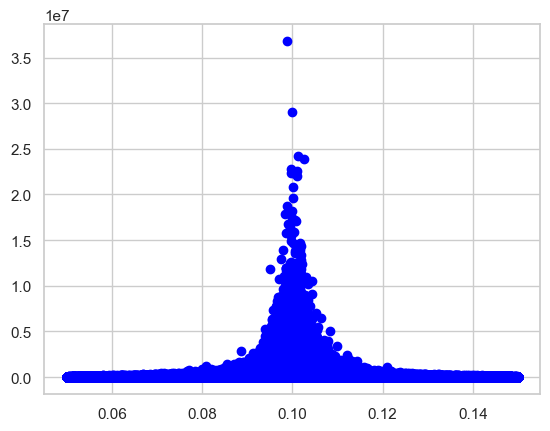

In [134]:
### Turning the aggregated values into a scatter plot to see if we can see some kind of relationships
x = df1['Commission Rate']
y = df1['Sale Price']
plt.scatter(x, y, c='Blue')
plt.show()

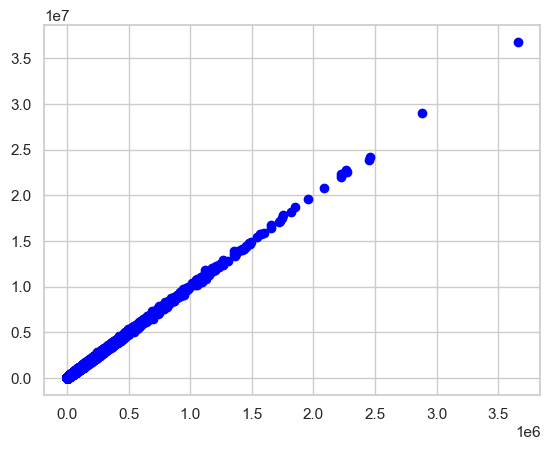

In [135]:
x = df1['Commission Earned']
y = df1['Sale Price']
plt.scatter(x, y, c='Blue')
plt.show()

### nhận xét
những người được trả lương cao nhất là những người bán được doanh số nhiều nhất, chứ không phải những người có tỷ lệ hoa hồng cao nhất

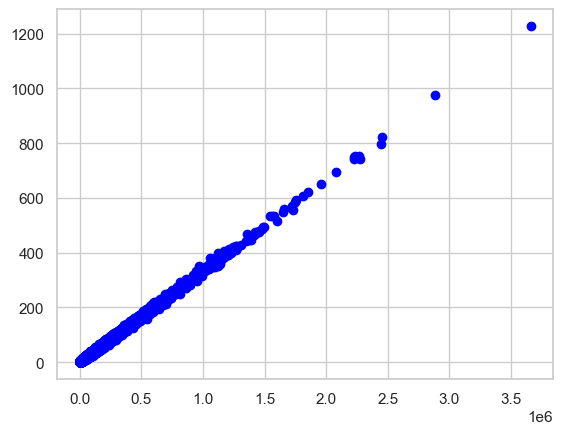

In [136]:
#   phân tích để giải thích về những người có tỷ lệ hóa hồng cao
#   analysis to explain those with high commission rates
x = df1['Commission Earned']
y = df1['TotalTransactions']
plt.scatter(x, y, c='Blue')
plt.show()

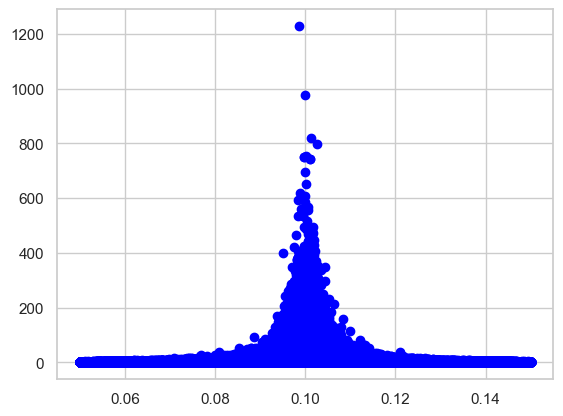

In [137]:
x = df1['Commission Rate']
y = df1['TotalTransactions']
plt.scatter(x, y, c='Blue')
plt.show()

### kết luận cuối cùng là bán xe càng nhiều thì lương càng cao, và không phải bán xe nhiều là có tỷ lệ hoa hồng cao mà tỷ lệ hoa hồng cao có thể bị ảnh hưởng bởi 1 yếu tố khác. Có lẽ yếu tố đó không có trong dataset mà ta khám phá

In [138]:
### hết code bên kaggle 3

In [139]:
### code bên kaggle 2

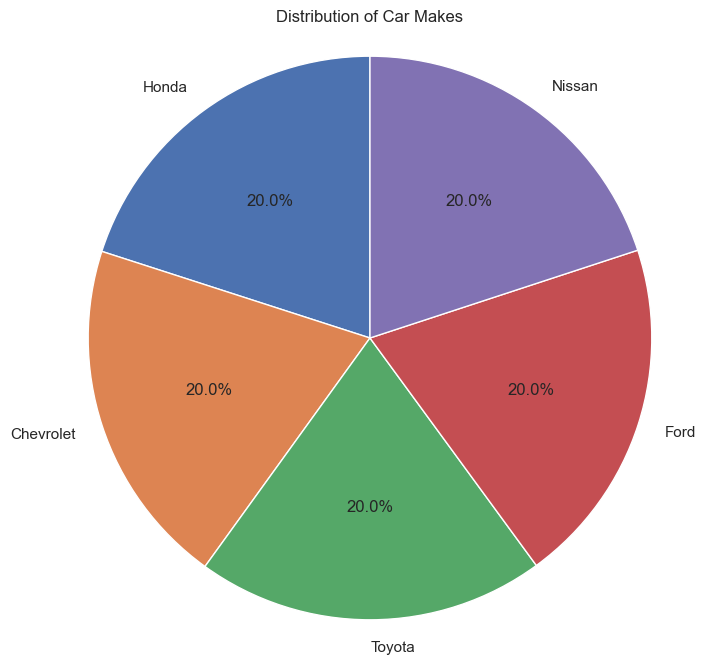

In [140]:
# Get value counts for car makes
car_make_counts = df['Car Make'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(car_make_counts, labels=car_make_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Distribution of Car Makes')

plt.show()

-   The top 5 Car Models are Silverado, Civic, Corolla, F-150, and Altima with a percentage distribution of 20.03%, 20.02%, 20.01%, 19.99%, and 19.95% respectively.

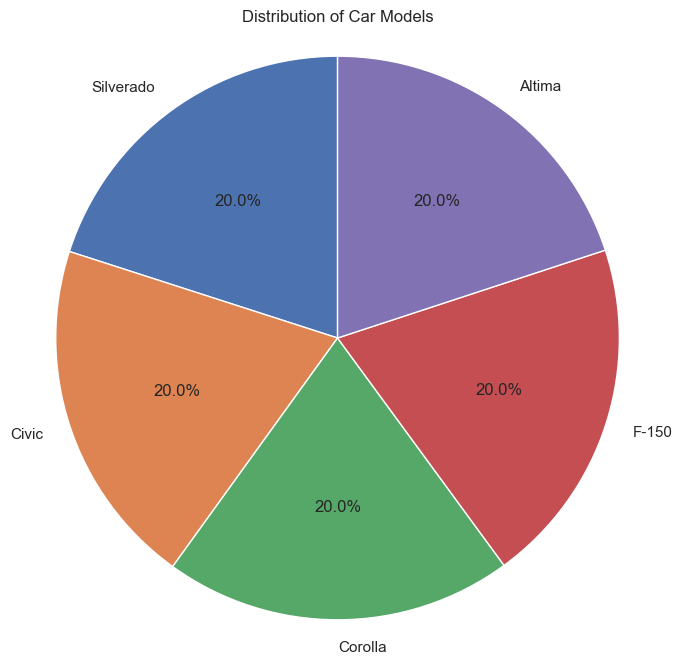

In [141]:
# Get value counts for car makes
car_make_counts = df['Car Model'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(car_make_counts, labels=car_make_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Distribution of Car Models')

plt.show()

-   The top 5 Car Makes are Honda, Chevrolet, Toyota, Ford, and Nissan with a percentage distribution of 20.03%, 20.02%, 20.01%, 19.99%, and 19.96% respectively.

In [142]:
top_salespersons = df['Salesperson'].value_counts().head(5)
print(top_salespersons)

Salesperson
Michael Smith      1229
Michael Johnson     976
David Smith         821
James Smith         796
Jennifer Smith      753
Name: count, dtype: int64


In [143]:
df['Car Make'].describe()

count     2500000
unique          5
top         Honda
freq       500687
Name: Car Make, dtype: object

In [144]:
most_sold_car_make = df['Car Make'].value_counts()
most_sold_car_make_name = most_sold_car_make.idxmax()
most_sold_car_make_count = most_sold_car_make.max()
print(f"The most sold car make is: {most_sold_car_make_name} with {most_sold_car_make_count} units sold.")

The most sold car make is: Honda with 500687 units sold.


In [145]:
most_sold_model = df['Car Model'].value_counts().index[0]
print("The most sold car model is:", most_sold_model)

The most sold car model is: Silverado


In [146]:
yearly_sales = df.groupby('Car Year')['Sale Price'].sum().reset_index()
yearly_sales = yearly_sales.sort_values(by='Sale Price', ascending=False)
print(yearly_sales)

    Car Year  Sale Price
5       2015  5787448830
7       2017  5785627889
3       2013  5785345440
10      2020  5782422975
0       2010  5781746875
4       2014  5779464242
6       2016  5777008549
8       2018  5776261553
2       2012  5776172347
9       2019  5768079806
1       2011  5751909061
11      2021  5744104226
12      2022  5734855062


In [147]:
num_year_make = df.groupby('Car Year')['TotalTransactions'].sum()
num_year_make

Car Year
2010    192462
2011    191800
2012    192454
2013    192970
2014    192491
2015    192595
2016    192267
2017    192663
2018    192549
2019    192225
2020    192657
2021    191636
2022    191231
Name: TotalTransactions, dtype: int64

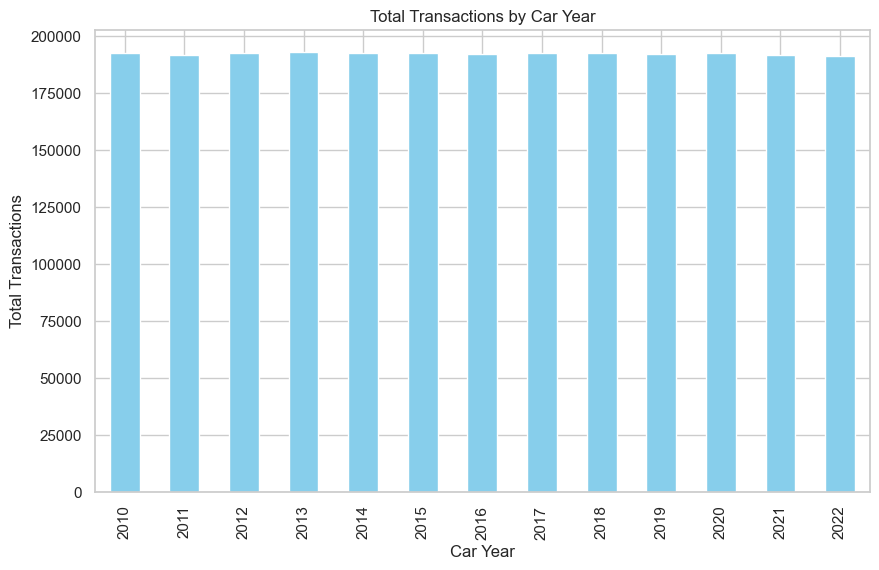

In [148]:
# Create a line chart to visualize the yearly sales percentage
plt.figure(figsize=(10, 6))
num_year_make.plot(kind='bar', color='skyblue')
plt.title('Total Transactions by Car Year')
plt.xlabel('Car Year')
plt.ylabel('Total Transactions')
plt.show()

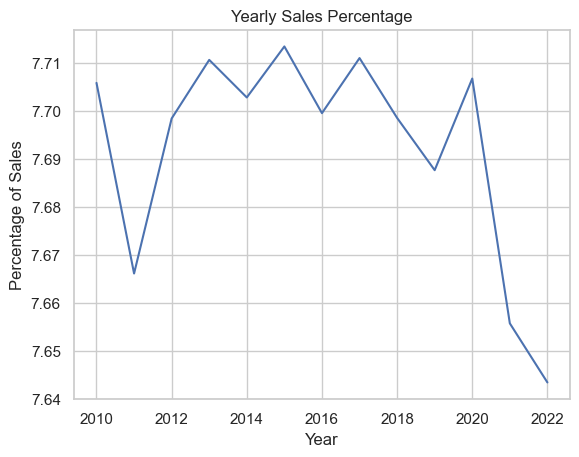

In [149]:
# Group the data by year and calculate the total sales for each year
yearly_sales = df.groupby('Car Year')['Sale Price'].sum()

# Calculate the percentage of sales for each year
yearly_sales_perc = yearly_sales / yearly_sales.sum() * 100

# Create a line chart to visualize the yearly sales percentage
plt.plot(yearly_sales_perc.index, yearly_sales_perc.values)
plt.xlabel('Year')
plt.ylabel('Percentage of Sales')
plt.title('Yearly Sales Percentage')
plt.show()

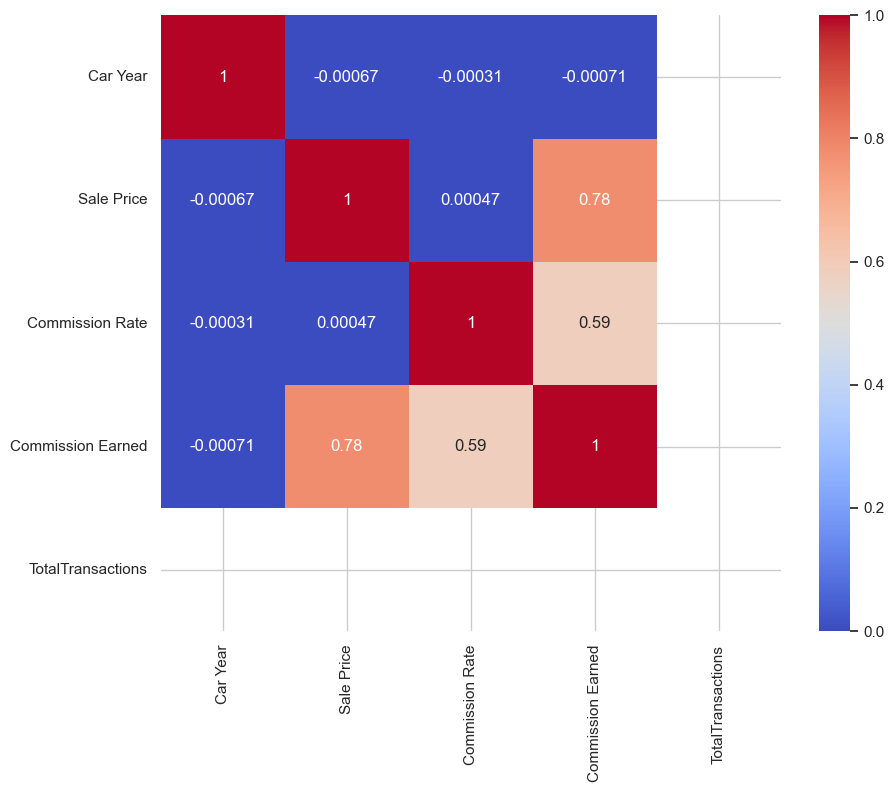

In [150]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

-   Sale Price có mối tương quan mạnh với Commission Earned, và Commission Earned có mối tương quan khá mạnh với Commission Rate

In [151]:
print(numeric_df.corr())

                   Car Year  Sale Price  Commission Rate  Commission Earned  \
Car Year           1.000000   -0.000667        -0.000311          -0.000713   
Sale Price        -0.000667    1.000000         0.000474           0.779319   
Commission Rate   -0.000311    0.000474         1.000000           0.585176   
Commission Earned -0.000713    0.779319         0.585176           1.000000   
TotalTransactions       NaN         NaN              NaN                NaN   

                   TotalTransactions  
Car Year                         NaN  
Sale Price                       NaN  
Commission Rate                  NaN  
Commission Earned                NaN  
TotalTransactions                NaN  


-   Based on the correlation matrix you provided, there seems to be a positive correlation between the sale price and commission earned variables, with a correlation coefficient of 0.78. This suggests that as the sale price of a car increases, the commission earned by the salesperson also tends to increase.
-   There is also a moderate positive correlation between commission rate and commission earned, with a correlation coefficient of 0.59. This indicates that higher commission rates are associated with higher commission earnings for the salesperson.
-   However, there is no correlation between car year and the other variables, as the correlation coefficients are very close to zero.

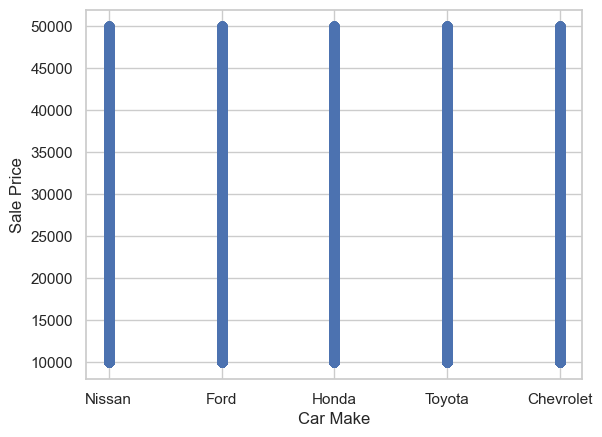

In [152]:
#   Is there a relationship between the car make and the sale price?
plt.scatter(df['Car Make'], df['Sale Price'])
plt.xlabel('Car Make')
plt.ylabel('Sale Price')
plt.show()

In [153]:
#   Do newer cars generally have higher sale prices?
corr = df['Car Year'].corr(df['Sale Price'])
print(corr)

-0.0006665070424949082


-   The correlation between Car Year and Sale Price is -0.0006665, which indicates a very weak negative correlation. Therefore, it can be concluded that there is no significant relationship between the age of the car and its sale price in this dataset.

In [154]:
#   Is there a difference in commission earned between different car models?
model_commission = df.groupby('Car Model')['Commission Earned'].mean()
print(model_commission)

Car Model
Altima       3002.709561
Civic        2998.917742
Corolla      3003.309835
F-150        2997.871415
Silverado    3002.219432
Name: Commission Earned, dtype: float64


In [155]:
#   Do certain salespersons perform better than others in terms of sales or commission earned?
salesperson_sales = df.groupby('Salesperson')['Sale Price'].sum()
salesperson_commission = df.groupby('Salesperson')['Commission Earned'].sum()

# Sort by total sales
salesperson_sales = salesperson_sales.sort_values(ascending=False)

# Sort by commission earned
salesperson_commission = salesperson_commission.sort_values(ascending=False)

In [156]:
salesperson_commission

Salesperson
Michael Smith         3658467.56
Michael Johnson       2883629.29
David Smith           2456566.33
James Smith           2448405.59
Robert Smith          2275950.52
                         ...    
Christy Pennington        510.12
Cheryl Erickson           508.91
Mr. Joseph Garrett        508.32
Felicia Mcneil            506.50
James Rogers DDS          503.33
Name: Commission Earned, Length: 518657, dtype: float64

In [157]:
salesperson_total_commission = df.groupby('Salesperson')['Commission Earned'].sum().sort_values(ascending=False)
print(salesperson_total_commission)

Salesperson
Michael Smith         3658467.56
Michael Johnson       2883629.29
David Smith           2456566.33
James Smith           2448405.59
Robert Smith          2275950.52
                         ...    
Christy Pennington        510.12
Cheryl Erickson           508.91
Mr. Joseph Garrett        508.32
Felicia Mcneil            506.50
James Rogers DDS          503.33
Name: Commission Earned, Length: 518657, dtype: float64


After analyzing the car sales data, several insights were obtained. The dataset contained information about car sales, including the car model, car make, salesperson, sale price, commission rate, commission earned, and car year.

Some of the key findings from the analysis include:

-   The top 5 car models sold were the Silverado, Civic, Corolla, F-150, and Altima.
-   The top 5 car makes sold were Honda, Chevrolet, Toyota, Ford, and Nissan.
-   The top 5 salespersons in terms of commission earned were Michael Smith, Michael Johnson, David Smith, James Smith, and Robert Smith.
-   The car model with the highest sales was the Silverado, followed closely by the Civic and Corolla.
-   The car make with the highest sales was Toyota, followed closely by Honda and Chevrolet.
-   There was a weak negative correlation between car year and sale price, suggesting that newer cars did not necessarily have higher sale prices.
-   There was no strong correlation between car make and sale price.
-   There was a slight difference in commission earned between different car models, with Corolla having the highest commission earned and F-150 having -  the lowest.
Overall, this analysis provides some useful insights into the car sales data. However, further analysis could be performed to gain a deeper understanding of the data, such as analyzing the relationship between commission rate and commission earned, or examining the performance of individual salespersons over time.

In [158]:
### hết code bên kaggle 2
#mô tả
#làm sạch
#Mối tương quan #
#gom cụm #
#KNN
#cây quyết định
#hồi quy
#Train model

###

In [159]:
# tính số lượng xe honda theo từng mẫu
df_honda = df[df['Car Make'] == 'Honda']
df_honda.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Year,Month,TotalTransactions
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85,2022,6,1
6,2022-06-12,Ashley Brown,Tyler Lawson,Honda,F-150,2013,41397,0.142780,5910.67,2022,6,1
10,2023-03-12,Harold Nelson,Isaac Patton,Honda,Silverado,2021,41259,0.092541,3818.16,2023,3,1
15,2022-12-21,James Velasquez,Natalie Thompson,Honda,Corolla,2016,36607,0.055251,2022.57,2022,12,1
25,2023-02-15,Faith Pierce,Jimmy Dunn,Honda,Silverado,2016,35279,0.063400,2236.68,2023,2,1


In [160]:
df_honda.shape

(500687, 12)

In [161]:
car_model_counts = df[df['Car Make'] == 'Honda'].groupby(['Car Year', 'Car Model']).size().reset_index(name='Count')

# Display the result
print(car_model_counts)

    Car Year  Car Model  Count
0       2010     Altima   7668
1       2010      Civic   7780
2       2010    Corolla   7642
3       2010      F-150   7721
4       2010  Silverado   7798
..       ...        ...    ...
60      2022     Altima   7609
61      2022      Civic   7833
62      2022    Corolla   7643
63      2022      F-150   7849
64      2022  Silverado   7592

[65 rows x 3 columns]


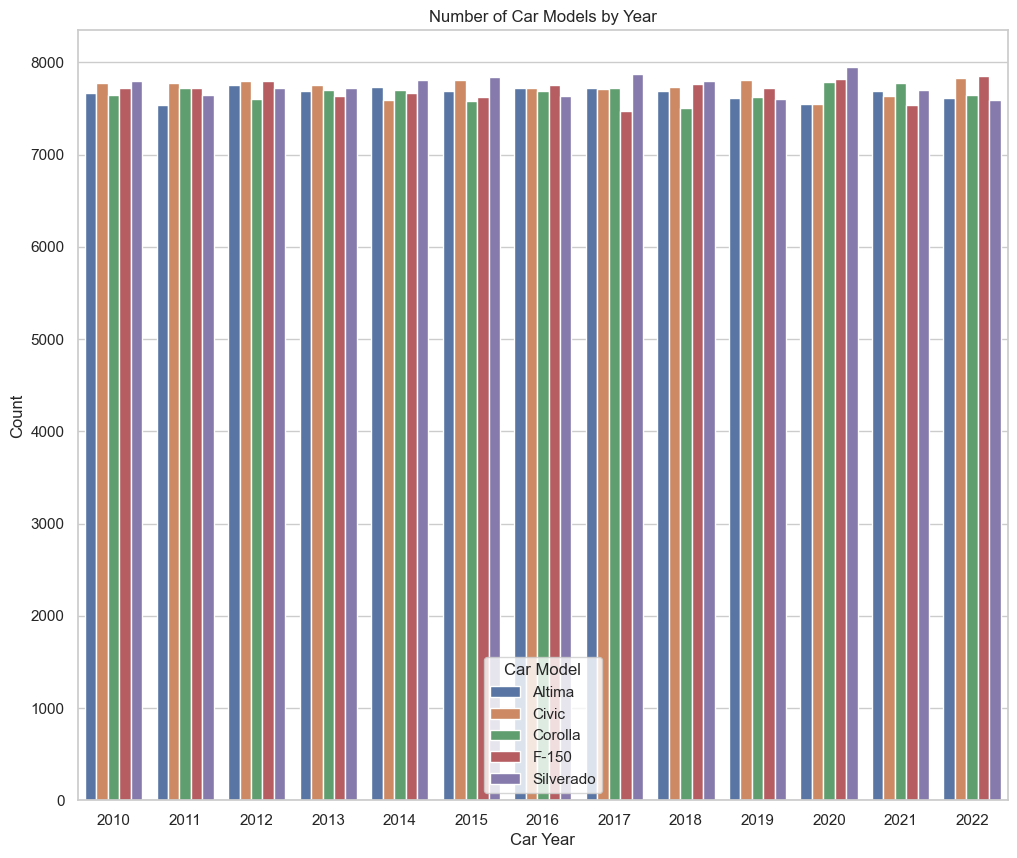

In [162]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 10))
sns.barplot(x='Car Year', y='Count', hue='Car Model', data=car_model_counts)
plt.title('Number of Car Models by Year')
plt.xlabel('Car Year')
plt.ylabel('Count')
plt.show()

In [163]:
df.groupby('Customer Name')['TotalTransactions'].sum().sort_values(ascending=False).head()

Customer Name
Michael Smith      1167
Michael Johnson     889
David Smith         796
James Smith         789
Jennifer Smith      787
Name: TotalTransactions, dtype: int64

In [164]:
df.groupby('Customer Name')['Commission Earned'].sum().sort_values(ascending=False).head()

Customer Name
Michael Smith       3463226.21
Michael Johnson     2598959.83
James Smith         2405014.38
David Smith         2388019.37
Michael Williams    2380376.66
Name: Commission Earned, dtype: float64

In [165]:
#xe có giá cao nhất
most_expensive_order = df.sort_values(by='Sale Price', ascending=False).iloc[0]
print("Most Expensive Order:\n", most_expensive_order)


Most Expensive Order:
 Date                 2022-06-07 00:00:00
Salesperson                 Ann Peterson
Customer Name         Christy Washington
Car Make                          Toyota
Car Model                          F-150
Car Year                            2020
Sale Price                         50000
Commission Rate                 0.098834
Commission Earned                 4941.7
Year                                2022
Month                                  6
TotalTransactions                      1
Name: 648440, dtype: object


In [166]:
#xe có giá rẻ nhất
most_cheap_order = df.sort_values(by='Sale Price', ascending=True).iloc[0]
print("Most Cheap Order:\n", most_cheap_order)

Most Cheap Order:
 Date                 2022-08-20 00:00:00
Salesperson               Jessica Rogers
Customer Name            Christina Smith
Car Make                       Chevrolet
Car Model                          Civic
Car Year                            2012
Sale Price                         10000
Commission Rate                 0.070313
Commission Earned                 703.13
Year                                2022
Month                                  8
TotalTransactions                      1
Name: 263479, dtype: object


In [168]:
# Lấy dữ liệu cần cho K-means
X = df[['Salesperson', 'TotalTransactions']]
# Sử dụng KMeans để gom cụm
kmeans = KMeans(n_clusters=3, random_state=42)  # Chọn số lượng cụm (clusters) tùy ý
# df_clusters1 = kmeans.fit_predict(X)

# # Hiển thị các cụm
# print("Cluster Centers:\n", kmeans.cluster_centers_)
# print("\nNumber of Salespeople in Each Cluster:\n", df_clusters1)

# Đây là DataFrame sau khi thêm cột Cluster
#print(df_clusters1)

ValueError: could not convert string to float: 'Monica Moore MD'